In [ ]:
# Following this publication for Power Calculation
# https://www.nature.com/articles/s41385-022-00548-1

In [ ]:
# Type3: Comparison of the odds between two groups
# Note: Odds Ratio is useful to compare the presence or absence of one particular species between two groups

#The following formula is used to estimate per group sample size for an odds ratio, assuming equal sample sizes in both groups45:
#• Define κ 1⁄4 n1 as the ratio of the numbers of individuals in the groups, 1 and 2, where 1 and 2 are n2
#defined based on the exposure variable X.
#• Define the odds ratio (OR) as:
#OR 1⁄4 p1ð1p2Þ ; p2ð1p1Þ
#where p1 and p2 are proportions of the samples where the taxon abundance is above the chosen threshold (e.g., median) in the two exposure groups.
#Then:
#n1 1⁄4κn2,and
#n2 1⁄4 ð 1 þ 1 Þðzðα=2Þ þz1βÞ2; Equation F κp1ð1p1Þ p2ð1p2Þ lnðORÞ

Sample Sizes for Odds Ratios (p1 | p2 | Ratio | Group 1 Size | Group 2 Size):
p1 = 0.4, p2 = 0.5, Ratio = 1.0: Group 1 = 96, Group 2 = 96
p1 = 0.4, p2 = 0.5, Ratio = 2.0: Group 1 = 144, Group 2 = 72
p1 = 0.4, p2 = 0.5, Ratio = 3.0: Group 1 = 192, Group 2 = 64
p1 = 0.3, p2 = 0.5, Ratio = 1.0: Group 1 = 22, Group 2 = 22
p1 = 0.3, p2 = 0.5, Ratio = 2.0: Group 1 = 34, Group 2 = 17
p1 = 0.3, p2 = 0.5, Ratio = 3.0: Group 1 = 45, Group 2 = 15
p1 = 0.2, p2 = 0.5, Ratio = 1.0: Group 1 = 9, Group 2 = 9
p1 = 0.2, p2 = 0.5, Ratio = 2.0: Group 1 = 14, Group 2 = 7
p1 = 0.2, p2 = 0.5, Ratio = 3.0: Group 1 = 18, Group 2 = 6


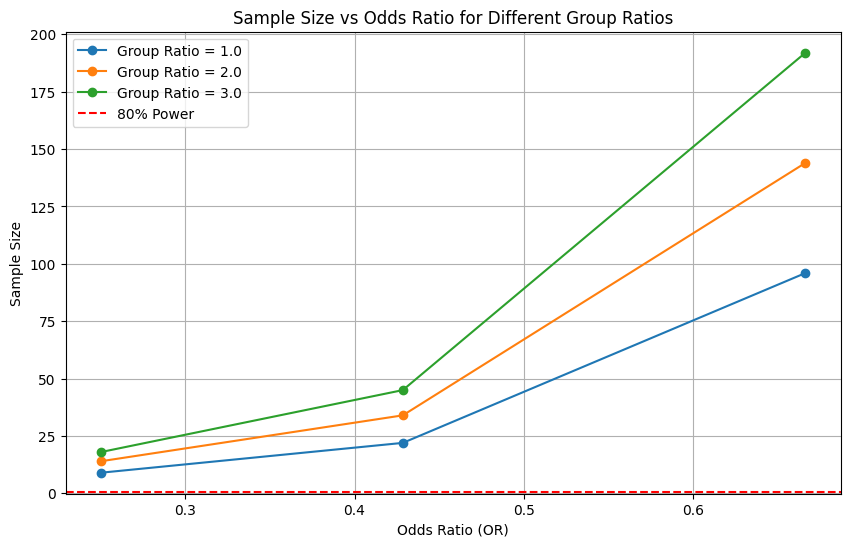

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate sample size for odds ratio comparison
def sample_size_odds_ratio(p1, p2, kappa=1.0, alpha=0.05, power=0.8):
    # Z-scores for alpha and power
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test (Z1-α)
    Z_beta = norm.ppf(power)  # Z1-β
    
    # Calculate odds ratio (OR)
    odds_ratio = (p1 * (1 - p2)) / (p2 * (1 - p1))
    
    # Log of odds ratio
    log_or = np.log(odds_ratio)
    
    # Calculate sample size for group 2 (n2)
    n2 = ((1 + 1/kappa) * (Z_alpha + Z_beta)**2) / (log_or**2)
    n2 = int(np.ceil(n2))  # Round up to the next whole number
    
    # Sample size for group 1 (n1)
    n1 = int(np.ceil(kappa * n2))  # Larger group size based on ratio
    
    return n1, n2

# Define parameters for proportions
proportions = [(0.4, 0.5), (0.3, 0.5), (0.2, 0.5)]  # Example proportions (p1, p2)
alpha = 0.05  # Type I error rate
power = 0.8  # Desired power (80%)

# Store sample sizes for plotting
sample_sizes_odds_ratios = {}

# Ratios for group sizes
ratios = [1.0, 2.0, 3.0]  # kappa values

# Calculate sample sizes for different odds ratios (proportions)
for p1, p2 in proportions:
    for kappa in ratios:
        sample_sizes_odds_ratios[(p1, p2, kappa)] = sample_size_odds_ratio(p1, p2, kappa, alpha, power)

# Print the results for odds ratios
print("Sample Sizes for Odds Ratios (p1 | p2 | Ratio | Group 1 Size | Group 2 Size):")
for (p1, p2, kappa) in sample_sizes_odds_ratios:
    n1, n2 = sample_sizes_odds_ratios[(p1, p2, kappa)]
    print(f"p1 = {p1}, p2 = {p2}, Ratio = {kappa}: Group 1 = {n1}, Group 2 = {n2}")

# Plot sample sizes vs difference in odds ratios
odds_ratios = [(p1 * (1 - p2)) / (p2 * (1 - p1)) for p1, p2 in proportions]
plt.figure(figsize=(10, 6))

for kappa in ratios:
    plt.plot(odds_ratios, [sample_sizes_odds_ratios[(p1, p2, kappa)][0] for p1, p2 in proportions],
             label=f"Group Ratio = {kappa}", marker='o')

plt.title('Sample Size vs Odds Ratio for Different Group Ratios')
plt.xlabel('Odds Ratio (OR)')
plt.ylabel('Sample Size')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power')
plt.legend()
plt.grid(True)
plt.show()

Proportion P1 (Cases with high diversity): 0.37037037037037035
Proportion P2 (Controls with high diversity): 0.4583333333333333
Unequal group sizes detected (Case: 27, Control: 24). Using unequal group formula.


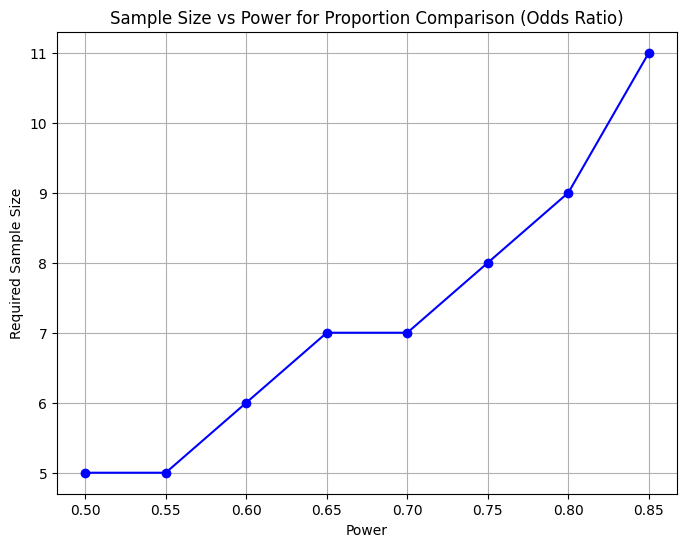

Power: 0.50, Sample Size: 5
Power: 0.55, Sample Size: 5
Power: 0.60, Sample Size: 6
Power: 0.65, Sample Size: 7
Power: 0.70, Sample Size: 7
Power: 0.75, Sample Size: 8
Power: 0.80, Sample Size: 9
Power: 0.85, Sample Size: 11


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load microbiome diversity or proportion data
#data = pd.read_csv('Richness_total_Equal.csv')  # Equal number of samples
data = pd.read_csv('Richness_total.csv')  # Unequal number of samples

# Define column names
group_column = 'Group'   # The column that defines 'Cases' and 'Controls'
shannon_column = 'Shannon'  # Column for Shannon diversity

# Split data into Cases and Controls
case_data = data[data[group_column] == 'Cases']
control_data = data[data[group_column] == 'Controls']

# Define a threshold for high Shannon diversity (adjust based on your data)
shannon_threshold = 3.0  # Example threshold for high diversity

# Calculate proportion of high Shannon diversity (above the threshold) in each group
P1 = np.mean(case_data[shannon_column] > shannon_threshold)  # Proportion in 'Cases'
P2 = np.mean(control_data[shannon_column] > shannon_threshold)  # Proportion in 'Controls'

# Print the proportions
print(f"Proportion P1 (Cases with high diversity): {P1}")
print(f"Proportion P2 (Controls with high diversity): {P2}")

# Function to calculate odds ratio
def calculate_odds_ratio(P1, P2):
    if P1 == 0 or P2 == 0:
        return np.inf  # To avoid division by zero
    odds1 = P1 / (1 - P1)
    odds2 = P2 / (1 - P2)
    odds_ratio = odds1 / odds2
    return odds_ratio

# Function to calculate sample size using odds ratio formula
def sample_size_odds_ratio(P1, P2, alpha=0.05, power=0.8):
    OR = calculate_odds_ratio(P1, P2)
    
    if OR == np.inf:
        print("One of the proportions is zero; odds ratio is infinite.")
        return np.nan  # Cannot calculate sample size

    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    # Numerator based on Equation F (for odds ratio)
    numerator = (Z_alpha + Z_beta) ** 2
    # Denominator (effect size term involving proportions)
    denominator = np.log(OR) ** 2 * (1 / (P1 * (1 - P1)) + 1 / (P2 * (1 - P2)))

    # Debugging information
    print(f"Odds Ratio (OR): {OR}")
    print(f"Numerator: {numerator}, Denominator: {denominator}")

    # Sample size calculation
    if denominator <= 0:
        print("Denominator is zero or negative; invalid sample size.")
        return np.nan

    sample_size = numerator / denominator
    return int(np.ceil(sample_size))

# Function to calculate sample size for unequal group sizes
def sample_size_unequal_odds_ratio(P1, P2, r, alpha=0.05, power=0.8):
    OR = calculate_odds_ratio(P1, P2)
    if OR == np.inf:
        print("One of the proportions is zero; odds ratio is infinite.")
        return np.nan  # Cannot calculate sample size

    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    # Numerator based on Equation F (for odds ratio)
    numerator = (Z_alpha + Z_beta) ** 2
    # Denominator (effect size term involving proportions)
    denominator = np.log(OR) ** 2 * (1 / (P1 * (1 - P1)) + 1 / (P2 * (1 - P2)))

    # Sample size for smaller group
    if denominator <= 0:
        print("Denominator is zero or negative; invalid sample size.")
        return np.nan

    n2 = numerator / denominator
    n2 = int(np.ceil(n2))

    # Larger group sample size
    n1 = int(np.ceil(r * n2))
    return n1, n2

# Determine the group sizes
group_sizes = data.groupby(group_column).size()
n_case = group_sizes['Cases']
n_control = group_sizes['Controls']

# Determine if groups are equal or unequal in size
if n_case == n_control:
    print("Equal group sizes detected. Using the odds ratio sample size formula.")
    sample_size_func = sample_size_odds_ratio
else:
    print(f"Unequal group sizes detected (Case: {n_case}, Control: {n_control}). Using unequal group formula.")
    ratio = max(n_case, n_control) / min(n_case, n_control)
    sample_size_func = lambda P1, P2, alpha, power: sample_size_unequal_odds_ratio(P1, P2, ratio, alpha, power)

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels
alpha = 0.05

# Calculate sample sizes for different power levels
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_func(P1, P2, alpha, power)
    if isinstance(sample_size, tuple):
        sample_sizes.append(max(sample_size))  # Use the larger sample size for unequal groups
    elif np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title('Sample Size vs Power for Proportion Comparison (Odds Ratio)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")


Proportion of High Diversity for Cases with Alcohol No: 0.2857142857142857
Proportion of High Diversity for Cases with Alcohol Yes: 0.4
Proportion of High Diversity for Controls with Alcohol No: 0.375
Proportion of High Diversity for Controls with Alcohol Yes: 0.5
Proportion P1 (Cases with Alcohol Yes): 0.4
Proportion P1 (Cases with Alcohol No): 0.2857142857142857
Proportion P2 (Controls with Alcohol Yes): 0.5
Proportion P2 (Controls with Alcohol No): 0.375
Odds Ratio (OR): 0.6666666666666667
Numerator: 3.8414588206941254, Denominator: 1.3426159567941838
Odds Ratio (OR): 0.6666666666666667
Numerator: 4.349833022957037, Denominator: 1.3426159567941838
Odds Ratio (OR): 0.6666666666666667
Numerator: 4.898745970828872, Denominator: 1.3426159567941838
Odds Ratio (OR): 0.6666666666666667
Numerator: 5.500359155856688, Denominator: 1.3426159567941838
Odds Ratio (OR): 0.6666666666666667
Numerator: 6.172066955186782, Denominator: 1.3426159567941838
Odds Ratio (OR): 0.6666666666666667
Numerator: 

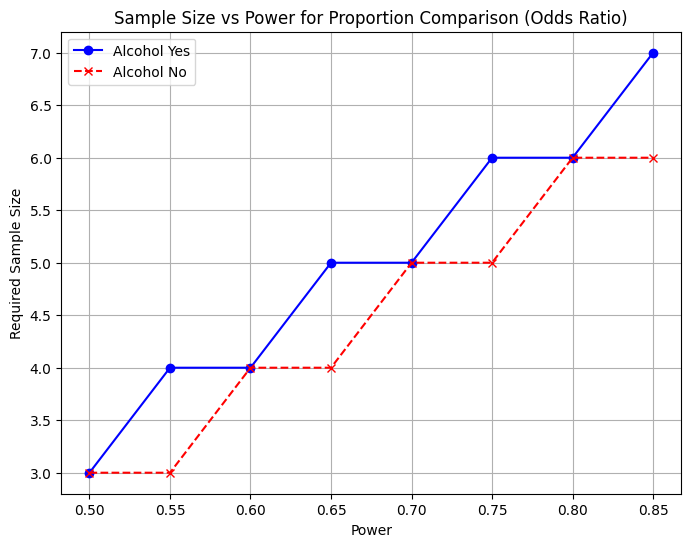

Sample sizes for Alcohol Yes:
Power: 0.50, Sample Size: 3
Power: 0.55, Sample Size: 4
Power: 0.60, Sample Size: 4
Power: 0.65, Sample Size: 5
Power: 0.70, Sample Size: 5
Power: 0.75, Sample Size: 6
Power: 0.80, Sample Size: 6
Power: 0.85, Sample Size: 7
Sample sizes for Alcohol No:
Power: 0.50, Sample Size: 3
Power: 0.55, Sample Size: 3
Power: 0.60, Sample Size: 4
Power: 0.65, Sample Size: 4
Power: 0.70, Sample Size: 5
Power: 0.75, Sample Size: 5
Power: 0.80, Sample Size: 6
Power: 0.85, Sample Size: 6


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load microbiome diversity or proportion data
data = pd.read_csv('Richness_total.csv')  # Use the appropriate dataset
data['Alcohol'] = data['Alcohol'].apply(lambda x: 'No' if x == 'Never' else 'Yes')

# Define column names
group_column = 'Group'   # The column that defines 'Cases' and 'Controls'
shannon_column = 'Shannon'  # Column for Shannon diversity
alcohol_column = 'Alcohol'  # Column for Alcohol (Yes/No)

# Define a threshold for high Shannon diversity
shannon_threshold = 3.0  # Example threshold for high diversity

# Calculate proportions of high Shannon diversity stratified by Group and Alcohol
proportions = data.groupby([group_column, alcohol_column]).agg(
    High_Diversity_Proportion=('Shannon', lambda x: np.mean(x > shannon_threshold))
).reset_index()

# Print the proportions for each group
for index, row in proportions.iterrows():
    print(f"Proportion of High Diversity for {row[group_column]} with Alcohol {row[alcohol_column]}: {row['High_Diversity_Proportion']}")

# Get the proportions for Cases and Controls with and without Alcohol
P1_alcohol_yes = proportions.loc[(proportions[group_column] == 'Cases') & (proportions[alcohol_column] == 'Yes'), 'High_Diversity_Proportion'].values[0]
P1_alcohol_no = proportions.loc[(proportions[group_column] == 'Cases') & (proportions[alcohol_column] == 'No'), 'High_Diversity_Proportion'].values[0]

P2_alcohol_yes = proportions.loc[(proportions[group_column] == 'Controls') & (proportions[alcohol_column] == 'Yes'), 'High_Diversity_Proportion'].values[0]
P2_alcohol_no = proportions.loc[(proportions[group_column] == 'Controls') & (proportions[alcohol_column] == 'No'), 'High_Diversity_Proportion'].values[0]

# Print the proportions
print(f"Proportion P1 (Cases with Alcohol Yes): {P1_alcohol_yes}")
print(f"Proportion P1 (Cases with Alcohol No): {P1_alcohol_no}")
print(f"Proportion P2 (Controls with Alcohol Yes): {P2_alcohol_yes}")
print(f"Proportion P2 (Controls with Alcohol No): {P2_alcohol_no}")

# Function to calculate odds ratio
def calculate_odds_ratio(P1, P2):
    if P1 == 0 or P2 == 0:
        return np.inf  # To avoid division by zero
    odds1 = P1 / (1 - P1)
    odds2 = P2 / (1 - P2)
    odds_ratio = odds1 / odds2
    return odds_ratio

# Function to calculate sample size using odds ratio formula
def sample_size_odds_ratio(P1, P2, alpha=0.05, power=0.8):
    OR = calculate_odds_ratio(P1, P2)
    
    if OR == np.inf:
        print("One of the proportions is zero; odds ratio is infinite.")
        return np.nan  # Cannot calculate sample size

    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    # Numerator based on odds ratio formula
    numerator = (Z_alpha + Z_beta) ** 2
    # Denominator (effect size term involving proportions)
    denominator = np.log(OR) ** 2 * (1 / (P1 * (1 - P1)) + 1 / (P2 * (1 - P2)))

    # Debugging information
    print(f"Odds Ratio (OR): {OR}")
    print(f"Numerator: {numerator}, Denominator: {denominator}")

    # Sample size calculation
    if denominator <= 0:
        print("Denominator is zero or negative; invalid sample size.")
        return np.nan

    sample_size = numerator / denominator
    return int(np.ceil(sample_size))

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels
alpha = 0.05

# Calculate sample sizes for each combination of Alcohol and Group
sample_sizes_alcohol_yes = []
sample_sizes_alcohol_no = []

# Calculate sample sizes for different power levels for Alcohol 'Yes'
for power in power_levels:
    sample_size = sample_size_odds_ratio(P1_alcohol_yes, P2_alcohol_yes, alpha, power)
    if np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power} (Alcohol Yes)")
        sample_sizes_alcohol_yes.append(np.nan)
    else:
        sample_sizes_alcohol_yes.append(sample_size)

# Calculate sample sizes for different power levels for Alcohol 'No'
for power in power_levels:
    sample_size = sample_size_odds_ratio(P1_alcohol_no, P2_alcohol_no, alpha, power)
    if np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power} (Alcohol No)")
        sample_sizes_alcohol_no.append(np.nan)
    else:
        sample_sizes_alcohol_no.append(sample_size)

# Plotting power vs. sample size for both Alcohol 'Yes' and 'No'
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes_alcohol_yes, marker='o', linestyle='-', color='b', label='Alcohol Yes')
plt.plot(power_levels, sample_sizes_alcohol_no, marker='x', linestyle='--', color='r', label='Alcohol No')
plt.title('Sample Size vs Power for Proportion Comparison (Odds Ratio)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.legend()
plt.show()

# Print the results
print("Sample sizes for Alcohol Yes:")
for power, sample_size in zip(power_levels, sample_sizes_alcohol_yes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")

print("Sample sizes for Alcohol No:")
for power, sample_size in zip(power_levels, sample_sizes_alcohol_no):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")
